In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
large = 22
med = 16
small = 12
params = {
    "font.sans-serif": "Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi": 80,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)


In [11]:
# 高钾
# spss聚类结果
spss_cluster_label = [[9,11,10,17,18,8,2,15,16],
                        [1,4,13,14,3,5,12,6,7]]


In [12]:
label = []
for i in spss_cluster_label:
    ls = []
    for j in i:
        ls.append(j-1)
    label.append(ls)

In [13]:
df = pd.read_excel('2.2高钾.xlsx')
chemi = df.iloc[:,3:]

chemi.insert(chemi.shape[1], '组类', 0)

for i in range(len(label)):
    chemi.iloc[label[i],-1] = i

chemi.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),组类
0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,1
1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,0
2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,1
3,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,1
4,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47,1


In [14]:
# 每一组类中的文物编号为
print('不同组类的文物编号如下:\n', [set(df[chemi['组类']==i].文物编号.sort_values().values) for i in range(len(label))])
print('不同组类的文物采样点如下:\n', [set(df[chemi['组类']==i].文物采样点.sort_values().values) for i in range(len(label))])

不同组类的文物编号如下:
 [{3, 7, 9, 10, 12, 18, 21, 22, 27}, {1, 3, 4, 5, 6, 13, 14, 16}]
不同组类的文物采样点如下:
 [{'21', '07', '12', '22', '27', '09', '10', '03部位1', '18'}, {'16', '03部位2', '04', '01', '13', '06部位2', '06部位1', '05', '14'}]


In [15]:
df['组类'] = chemi.组类+1
df.to_excel('2.2高钾聚类结果.xlsx', index=False)

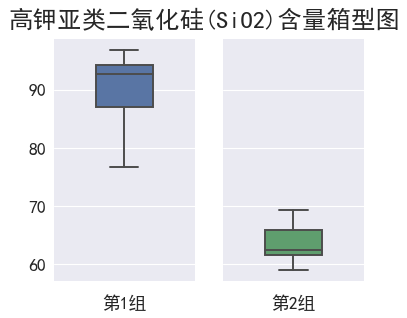

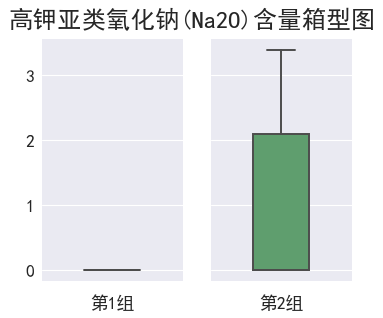

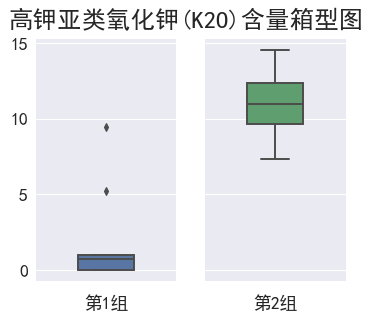

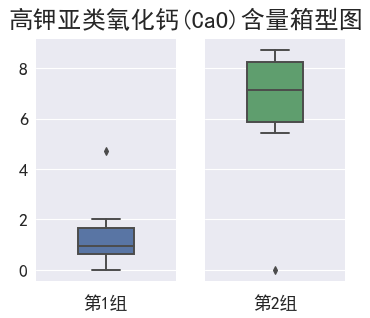

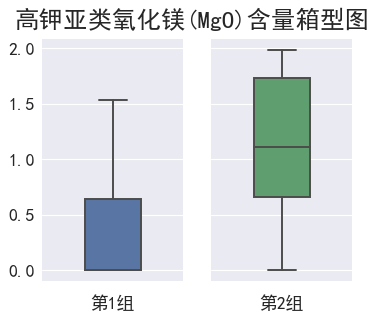

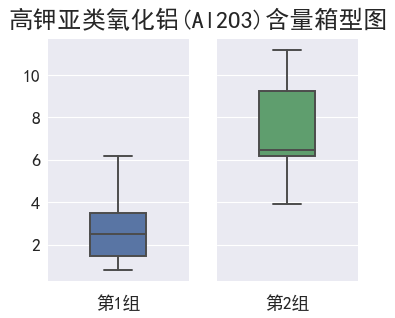

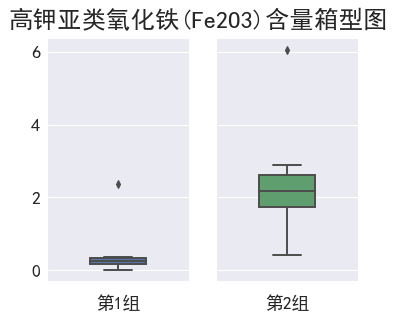

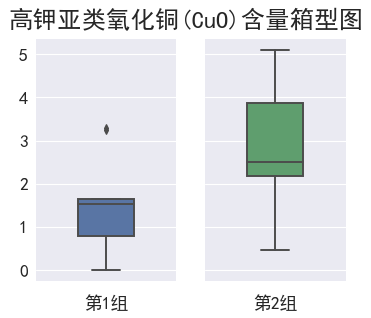

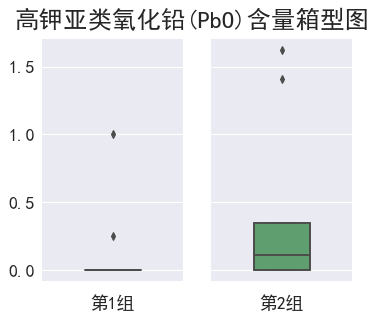

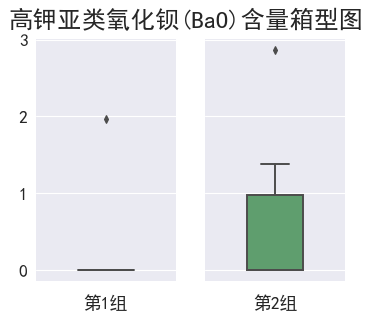

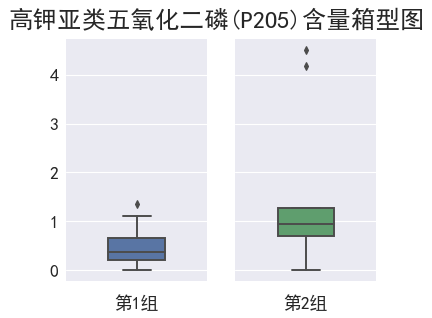

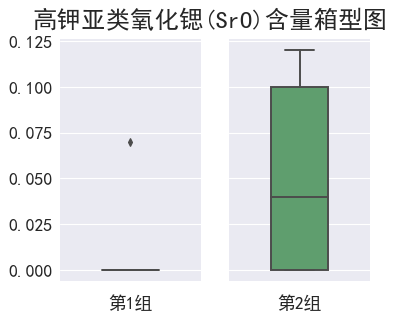

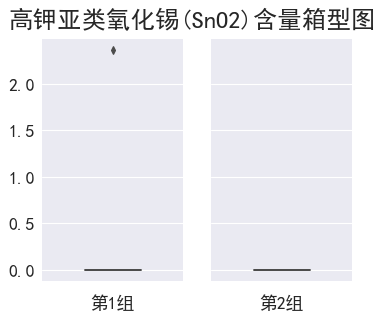

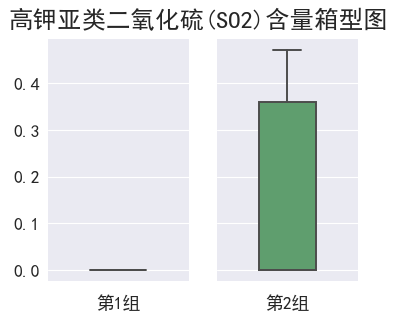

In [16]:
for col_id in range(chemi.shape[1]-1):
    fig, axes = plt.subplots(1,2,figsize=(5,4),sharey='row')
    title = '高钾亚类'+chemi.columns[col_id]+'含量箱型图'
    fig.suptitle(title)
    for i in range(len(label)):
        ax = axes[i]
        ax.set_xlabel('第%i组'%(i+1))
        sns.boxplot(y=chemi[chemi['组类'] == i].iloc[:,col_id].sort_values().values, color=sns.color_palette(n_colors=4)[i], ax=ax, width=0.4)
    plt.savefig('./系统聚类图/'+title+'.svg', bbox_inches='tight')
    plt.show()

In [17]:
j = 5
for i in range(len(label)):
    print(chemi[chemi['组类'] == i].iloc[:,j])

1     4.06
7     1.98
8     1.32
9     0.81
10    1.46
14    3.05
15    6.19
16    3.50
17    2.51
Name: 氧化铝(Al2O3), dtype: float64
0      3.93
2      5.50
3      6.44
4      7.50
5     11.15
6     10.05
11     6.16
12     9.23
13     6.18
Name: 氧化铝(Al2O3), dtype: float64


In [18]:
print(chemi.columns[j])
for i in range(len(label)):
    print(chemi[chemi['组类'] == i].iloc[:,j].min(), chemi[chemi['组类'] == i].iloc[:,j].mean(),
    chemi[chemi['组类'] == i].iloc[:,j].max())

氧化铝(Al2O3)
0.81 2.764444444444445 6.19
3.93 7.34888888888889 11.15
